# **Download and Clean Dataset**

#1. Install necessary packages:

In [ ]:
!pip install numpy
!pip install pandas
!pip install keras
!pip install scikit-learn

#2. Import necessary packages:

In [36]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Normalization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':80, 'axes.grid':True})

#3. Download and read CSV data with Pandas

In [3]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#4. Split data to label and features

In [4]:
label = concrete_data[['Strength']]
features = concrete_data.loc[:, concrete_data.columns != 'Strength']

#5. Normalize features

In [5]:
standard_features = StandardScaler().fit(features)
features_normalized = pd.DataFrame(standard_features.transform(features), columns=features.columns)

#6. Split data to  train and test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features_normalized, label, test_size = 0.2)

# **Build a Neural Network**

#1. Define regression model

In [7]:
def regression_model_2():
    # create model
    model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
    ])

    # compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error')
    return model

#2. Train and Test the Network

In [8]:
model = regression_model_2()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4608      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 6

In [9]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
18/18 - 5s - loss: 1227.1091 - val_loss: 303.2527 - 5s/epoch - 260ms/step
Epoch 2/100
18/18 - 0s - loss: 297.8297 - val_loss: 224.5265 - 271ms/epoch - 15ms/step
Epoch 3/100
18/18 - 0s - loss: 204.3118 - val_loss: 212.0266 - 419ms/epoch - 23ms/step
Epoch 4/100
18/18 - 0s - loss: 189.4118 - val_loss: 198.5179 - 318ms/epoch - 18ms/step
Epoch 5/100
18/18 - 0s - loss: 167.8269 - val_loss: 191.0012 - 238ms/epoch - 13ms/step
Epoch 6/100
18/18 - 0s - loss: 155.7908 - val_loss: 183.1862 - 245ms/epoch - 14ms/step
Epoch 7/100
18/18 - 0s - loss: 150.0234 - val_loss: 159.8962 - 304ms/epoch - 17ms/step
Epoch 8/100
18/18 - 0s - loss: 130.6006 - val_loss: 160.0384 - 300ms/epoch - 17ms/step
Epoch 9/100
18/18 - 0s - loss: 122.3071 - val_loss: 136.5355 - 239ms/epoch - 13ms/step
Epoch 10/100
18/18 - 0s - loss: 106.0447 - val_loss: 127.7432 - 288ms/epoch - 16ms/step
Epoch 11/100
18/18 - 0s - loss: 94.4728 - val_loss: 110.3308 - 279ms/epoch - 16ms/step
Epoch 12/100
18/18 - 0s - loss: 89.0964 - v

#3. Evaluate the results

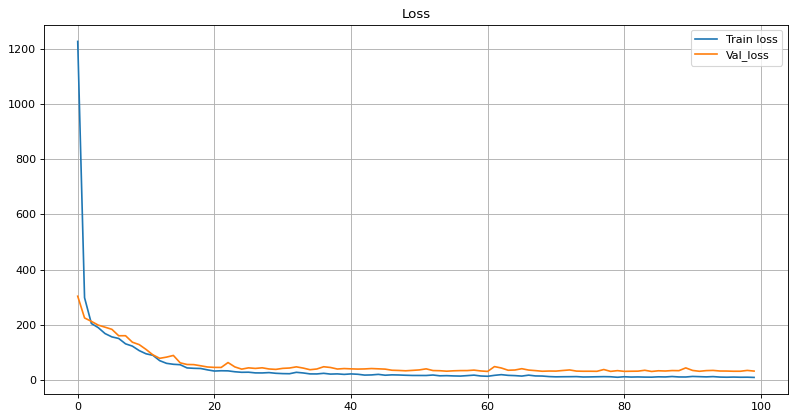

In [31]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.title("Loss")
plt.plot(loss, label="Train loss")
plt.plot(val_loss, label="Val_loss")
plt.legend()
plt.show()

In [38]:
predict = model.predict(X_test)
MSE = mean_squared_error(y_test, predict)
MAE = mean_absolute_error(y_test, predict)
print("MSE: {}\nMAE: {}".format(MSE, MAE))

7/7 [==============================] - 0s 3ms/step
MSE: 33.69087449906299
MAE: 4.237610638720318
